# TASK

# =========================

## In this section, find steps related to creating a choropleth map of US storm data.

### -Importing libraries, data, and JSON file
### -Wrangling data
### -Cleaning for missing and extreme values
### -Creating a choropleth map
### -Summarizing results and revisiting data questions

# =========================

# Import libraries

In [1]:
# Include folium library to create map

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

# Import data and JSON file

In [2]:
# Define path for df

path = r'/Users/matthewschleigh/Desktop/CareerFoundry/Achievement 6/Storms Project'

In [3]:
# Import data

storms = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'storms_address.csv'))

In [4]:
# Check output

storms.shape

(2031, 17)

In [5]:
storms.head()

,Unnamed: 0.1,Unnamed: 0,name,year,month,day,hour,latitude,longitude,status,category,wind_knots,pressure_hpa,trop_storm_force_wind_diameter,hurricane_force_wind_diameter,geom,address
0,0,1,Amy,1975,6,27,6,28.5,-79.0,tropical depression,-1,25,1013,NaN,NaN,"28.5,-79.0",NaN
1,1,2,Amy,1975,6,27,12,29.5,-79.0,tropical depression,-1,25,1013,NaN,NaN,"29.5,-79.0",NaN
2,2,3,Amy,1975,6,27,18,30.5,-79.0,tropical depression,-1,25,1013,NaN,NaN,"30.5,-79.0",NaN
3,3,4,Amy,1975,6,28,0,31.5,-78.8,tropical depression,-1,25,1012,NaN,NaN,"31.5,-78.8",NaN
4,4,5,Amy,1975,6,28,6,32.4,-78.7,tropical depression,-1,25,1012,NaN,NaN,"32.4,-78.7",NaN


In [6]:
# Drop unwanted columns

storms = storms.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0'])

In [7]:
storms.head()

,name,year,month,day,hour,latitude,longitude,status,category,wind_knots,pressure_hpa,trop_storm_force_wind_diameter,hurricane_force_wind_diameter,geom,address
0,Amy,1975,6,27,6,28.5,-79.0,tropical depression,-1,25,1013,NaN,NaN,"28.5,-79.0",NaN
1,Amy,1975,6,27,12,29.5,-79.0,tropical depression,-1,25,1013,NaN,NaN,"29.5,-79.0",NaN
2,Amy,1975,6,27,18,30.5,-79.0,tropical depression,-1,25,1013,NaN,NaN,"30.5,-79.0",NaN
3,Amy,1975,6,28,0,31.5,-78.8,tropical depression,-1,25,1012,NaN,NaN,"31.5,-78.8",NaN
4,Amy,1975,6,28,6,32.4,-78.7,tropical depression,-1,25,1012,NaN,NaN,"32.4,-78.7",NaN


# Import JSON file

In [8]:
us_geo = r'/Users/matthewschleigh/Desktop/CareerFoundry/Achievement 6/Storms Project/02 Data/Original Data/us-states.json'

In [9]:
# View JSON file for reference

f = open(r'/Users/matthewschleigh/Desktop/CareerFoundry/Achievement 6/Storms Project/02 Data/Original Data/us-states.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

# Wrangle your project data to meet the needs of your analysis. (Step 5)

In [10]:
# Check output

storms.head()

,name,year,month,day,hour,latitude,longitude,status,category,wind_knots,pressure_hpa,trop_storm_force_wind_diameter,hurricane_force_wind_diameter,geom,address
0,Amy,1975,6,27,6,28.5,-79.0,tropical depression,-1,25,1013,NaN,NaN,"28.5,-79.0",NaN
1,Amy,1975,6,27,12,29.5,-79.0,tropical depression,-1,25,1013,NaN,NaN,"29.5,-79.0",NaN
2,Amy,1975,6,27,18,30.5,-79.0,tropical depression,-1,25,1013,NaN,NaN,"30.5,-79.0",NaN
3,Amy,1975,6,28,0,31.5,-78.8,tropical depression,-1,25,1012,NaN,NaN,"31.5,-78.8",NaN
4,Amy,1975,6,28,6,32.4,-78.7,tropical depression,-1,25,1012,NaN,NaN,"32.4,-78.7",NaN


## I'll leave all columns in for the moment, as I'll be filtering more once I clean some missing data.

# Clean your data set — watch for missing and extreme values. (Step 6)

In [11]:
# Check for missing values

storms.isnull().sum()

name                                 0
year                                 0
month                                0
day                                  0
hour                                 0
latitude                             0
longitude                            0
status                               0
category                             0
wind_knots                           0
pressure_hpa                         0
trop_storm_force_wind_diameter    1108
hurricane_force_wind_diameter     1108
geom                                 0
address                           1146
dtype: int64

In [12]:
# Missing addresses are coordinates that are outside the contiguous US

df_states = storms.dropna(subset=['address'])

In [13]:
df_states.isnull().sum()

name                                0
year                                0
month                               0
day                                 0
hour                                0
latitude                            0
longitude                           0
status                              0
category                            0
wind_knots                          0
pressure_hpa                        0
trop_storm_force_wind_diameter    521
hurricane_force_wind_diameter     521
geom                                0
address                             0
dtype: int64

In [14]:
# Remaining missing values are diameter size. Replacing with 0's makes sense to avoid skewing data further.

storms_clean = df_states.fillna(0)

In [15]:
storms_clean.isnull().sum()

name                              0
year                              0
month                             0
day                               0
hour                              0
latitude                          0
longitude                         0
status                            0
category                          0
wind_knots                        0
pressure_hpa                      0
trop_storm_force_wind_diameter    0
hurricane_force_wind_diameter     0
geom                              0
address                           0
dtype: int64

In [16]:
# Check for duplicates

dups = storms_clean.duplicated()

In [17]:
dups.shape # no duplicates

(885,)

## Extreme values check

<AxesSubplot:xlabel='wind_knots', ylabel='Count'>

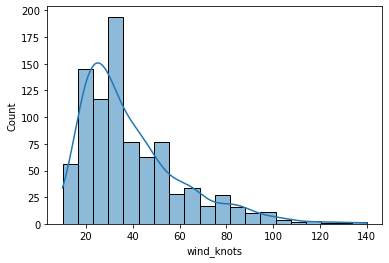

In [18]:
sns.histplot(storms_clean['wind_knots'], bins = 20, kde = True) 

# distribution suggests accurate values attributed to wind speed for tropical storms and hurricanes

<AxesSubplot:xlabel='category', ylabel='Count'>

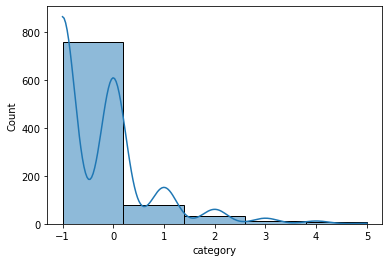

In [19]:
sns.histplot(storms_clean['category'], bins = 5, kde = True)

# category can only be from -1 to 5 for storm classification, shown here correctly within histogram

# Create a choropleth map using a variable of your choice. (Step 7)

## State names were reverse geocoded from coordinates

In [20]:
storms_clean.head()

,name,year,month,day,hour,latitude,longitude,status,category,wind_knots,pressure_hpa,trop_storm_force_wind_diameter,hurricane_force_wind_diameter,geom,address
25,Belle,1976,8,10,6,41.0,-73.2,tropical storm,0,60,983,0.0,0.0,"41.0,-73.2","Town of Smithtown, Suffolk County, New York, U..."
26,Belle,1976,8,10,12,42.6,-72.4,tropical storm,0,35,992,0.0,0.0,"42.6,-72.4","2, Hanson Court, Erving, Franklin County, Mass..."
27,Clara,1977,9,5,12,32.8,-80.0,tropical depression,-1,20,1015,0.0,0.0,"32.8,-80.0","Fuseler Road, Murry Hill, Charleston, Charlest..."
28,Clara,1977,9,5,18,33.2,-79.0,tropical depression,-1,20,1014,0.0,0.0,"33.2,-79.0",United States
39,Amelia,1978,7,31,18,28.6,-98.7,tropical depression,-1,30,1010,0.0,0.0,"28.6,-98.7","McMullen County, Texas, United States"


In [27]:
# Export for safety and to reformat state names

storms_clean.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'storms_address_clean.csv'))

## Import cleaned geocoded data

In [21]:
storms_states = pd.read_excel(os.path.join(path, '02 Data', 'Original Data', 'storms_states.xlsx'))

In [22]:
storms_states.shape

(883, 18)

In [23]:
storms_states.head()

,Unnamed: 0,name,year,month,day,hour,latitude,longitude,status,category,wind_knots,pressure_hpa,trop_storm_force_wind_diameter,hurricane_force_wind_diameter,storm_force_wind_diameter,geom,address_full,state
0,25,Belle,1976,8,10,6,41.0,-73.2,tropical storm,0,60,983,0,0,0,"41.0,-73.2","Town of Smithtown, Suffolk County, New York, U...",Pennsylvania
1,26,Belle,1976,8,10,12,42.6,-72.4,tropical storm,0,35,992,0,0,0,"42.6,-72.4","2, Hanson Court, Erving, Franklin County, Mass...",South Carolina
2,27,Clara,1977,9,5,12,32.8,-80.0,tropical depression,-1,20,1015,0,0,0,"32.8,-80.0","Fuseler Road, Murry Hill, Charleston, Charlest...",South Carolina
3,28,Clara,1977,9,5,18,33.2,-79.0,tropical depression,-1,20,1014,0,0,0,"33.2,-79.0",United States,South Carolina
4,39,Amelia,1978,7,31,18,28.6,-98.7,tropical depression,-1,30,1010,0,0,0,"28.6,-98.7","McMullen County, Texas, United States",South Carolina


In [24]:
# remove unneeded column

storms_states = storms_states.drop(columns = ['Unnamed: 0'])

In [25]:
storms_states.head()

,name,year,month,day,hour,latitude,longitude,status,category,wind_knots,pressure_hpa,trop_storm_force_wind_diameter,hurricane_force_wind_diameter,storm_force_wind_diameter,geom,address_full,state
0,Belle,1976,8,10,6,41.0,-73.2,tropical storm,0,60,983,0,0,0,"41.0,-73.2","Town of Smithtown, Suffolk County, New York, U...",Pennsylvania
1,Belle,1976,8,10,12,42.6,-72.4,tropical storm,0,35,992,0,0,0,"42.6,-72.4","2, Hanson Court, Erving, Franklin County, Mass...",South Carolina
2,Clara,1977,9,5,12,32.8,-80.0,tropical depression,-1,20,1015,0,0,0,"32.8,-80.0","Fuseler Road, Murry Hill, Charleston, Charlest...",South Carolina
3,Clara,1977,9,5,18,33.2,-79.0,tropical depression,-1,20,1014,0,0,0,"33.2,-79.0",United States,South Carolina
4,Amelia,1978,7,31,18,28.6,-98.7,tropical depression,-1,30,1010,0,0,0,"28.6,-98.7","McMullen County, Texas, United States",South Carolina


In [26]:
# choose columns for plotting in map

data_to_plot = storms_states[['state', 'year']]
data_to_plot.head()

,state,year
0,Pennsylvania,1976
1,South Carolina,1976
2,South Carolina,1977
3,South Carolina,1977
4,South Carolina,1978


In [27]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = us_geo, 
    data = data_to_plot,
    columns = ['state', 'year'],
    key_on = 'feature.properties.name', 
    legend_name = 'year').add_to(map)
folium.LayerControl().add_to(map)

map

In [28]:
map.save('landfall_plot_data.html')

# Discuss the results and what they mean in a markdown section. (Step 8)

## Does the analysis answer any of your existing research questions?

### I'm getting closer to answering two of my questions, namely:
    Do we see any pattern or trend to where storms make landfall over time?
    Are more states experiencing Atlantic basin storms each year? Or do the number of storms each year continue to affect mainly the same regions?
### The map above shows the total of storms from 1975-2020 to have made landfall in the US, but also accounts for those named storms that remained formed over the US in 6 hour increments. To be even more precise, I need to filter for each named storm as it first makes landfall each year, which can help me determine the spread of each season's storm range. And then I'd need to look at maps for each year at a time to see if the frequency of total storms making landfall in the US is increasing, decreasing, or remaining the same.

## Does the analysis lead you to any new research questions?

### Mostly I'm finding these exploratory visuals are helping me to hone in my queries to better answer the questions I already have. Based on the shading above, the maps suggests that there are as many storms making landfall in New York and Texas as there are in Florida, which is traditionally considered to be the state which sees the most Atlantic storms strike. My hunch is this is manifesting in the map because of my earlier assumption that the 6 hour tracking increments are skewing the totals in these directions, which would make the map look like it's including new individual storms, as opposed to the same storm over the path of its duration. 

# Export data

In [42]:
storms_states.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'storms_states.csv'))